In [ ]:
import pandas as pd

# Load the datasets from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file paths
Variable_Description_data_path = '/content/drive/MyDrive/Variable_Description.csv'
Train_data_path = '/content/drive/MyDrive/Train.csv'
test_data_path = '/content/drive/MyDrive/test.csv'

# Load the datasets
df = Variable_Description_data = pd.read_csv(Variable_Description_data_path)
Train_data = pd.read_csv(Train_data_path)
test_data = pd.read_csv(test_data_path)


# Create a dictionary to store the unique values for each column
unique_values = {}

# Iterate over each column
for column in df.columns:
    # Get the unique values for the column
    unique_values[column] = df[column].unique()

unique_values

Mounted at /content/drive


{'Variable Name': array(['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog',
        'MG811_analog', 'MQ135_analog', 'device name', 'CO2'], dtype=object),
 'Description': array(['The temperature reading from the device of the environment where the reading was taken',
        'The Humidity reading from the device of the environment where the reading was taken',
        'The raw output value from the MQ7 sensor ',
        'The raw output value from the MQ9 sensor ',
        'The raw output value from the MG811 sensor ',
        'The raw output value from the MQ135 sensor ',
        'Name of the IoT device that took this reading',
        'Actual value of CO2 in ppm from a reference instrument'],
       dtype=object)}

In [ ]:

# Load the training dataset
train_data_path = '/content/drive/MyDrive/Train.csv'
df = pd.read_csv(train_data_path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7307 non-null   object 
 1   Temperature   7307 non-null   float64
 2   Humidity      7307 non-null   float64
 3   MQ7_analog    7307 non-null   float64
 4   MQ9_analog    7307 non-null   float64
 5   MG811_analog  7307 non-null   float64
 6   MQ135_analog  7307 non-null   float64
 7   device_name   7307 non-null   object 
 8   CO2           7307 non-null   float64
dtypes: float64(7), object(2)
memory usage: 513.9+ KB


In [ ]:
# Display the first few rows of the dataset
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
          ID  Temperature  Humidity  MQ7_analog  MQ9_analog  MG811_analog  \
0  ID_000001       28.975    74.475      2480.0      3476.5        1572.0   
1  ID_000002       31.900    66.500      3813.0      2726.0        4145.0   
2  ID_000003       31.675    60.015      2811.0      1563.5        4250.0   
3  ID_000004       31.580    59.220      2844.0      1597.0        4310.0   
4  ID_000005       31.690    62.030      3159.5      1120.5        5519.5   

   MQ135_analog device_name     CO2  
0        1997.0       alpha  585.75  
1        3180.0       alpha  613.00  
2        2708.5       alpha  616.50  
3        2723.0       alpha  642.50  
4        1219.0       alpha  622.00  


In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ID              0
Temperature     0
Humidity        0
MQ7_analog      0
MQ9_analog      0
MG811_analog    0
MQ135_analog    0
device_name     0
CO2             0
dtype: int64


In [ ]:
# Summary statistics of numerical features
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Temperature     Humidity   MQ7_analog    MQ9_analog  MG811_analog  \
count  7307.000000  7307.000000  7307.000000   7307.000000   7307.000000   
mean     29.681726    69.593742  4230.820902   3976.708841   3995.126568   
std       2.016785     7.248136  1085.008100   1603.972744   1098.740604   
min      23.440000    52.200000  2380.000000   1098.500000   1353.500000   
25%      28.490000    65.665000  3362.500000   2832.500000   3181.000000   
50%      29.290000    70.555000  4061.000000   4073.000000   4137.000000   
75%      31.717500    74.350000  4780.750000   5286.166667   4731.000000   
max      33.850000    93.525000  9545.500000  10379.500000   7919.000000   

       MQ135_analog          CO2  
count   7307.000000  7307.000000  
mean    3444.788240   611.634608  
std      893.426679    16.540953  
min     1186.500000   573.166667  
25%     2912.500000   600.000000  
50%     3586.500000   608.000000  
75%     4143.750000   621.000000  
max     6257.0

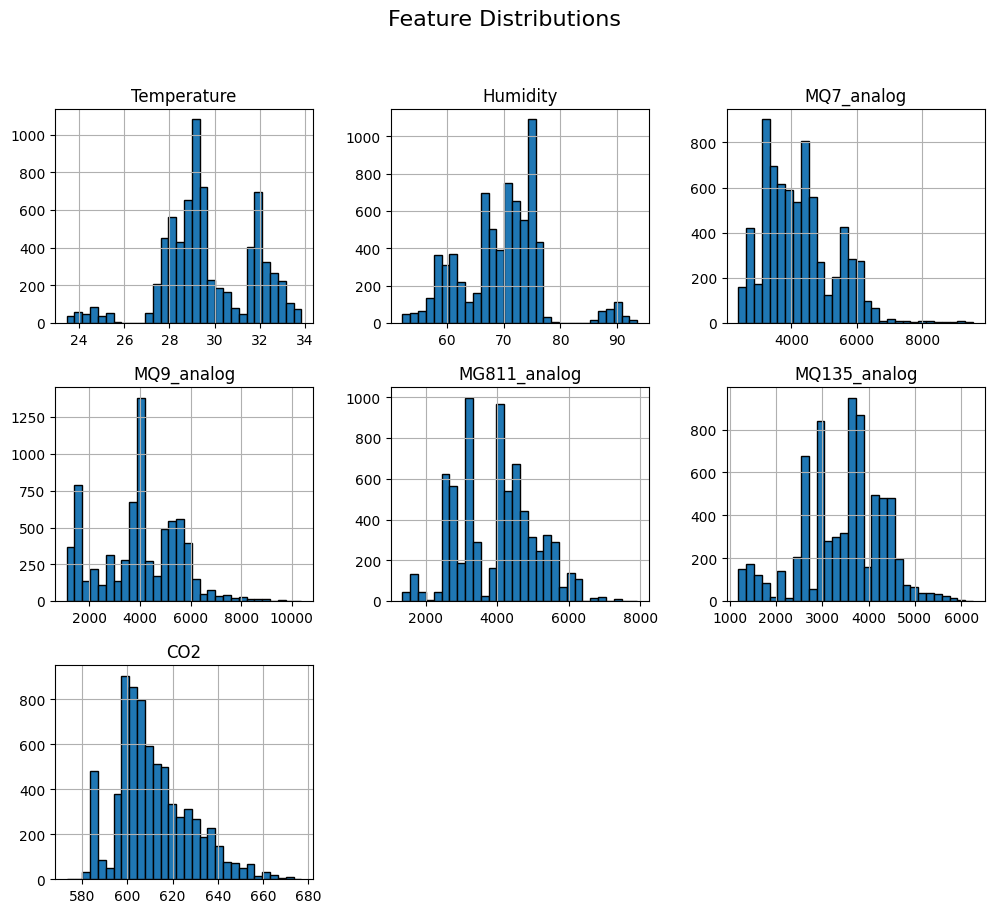

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numerical variables
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

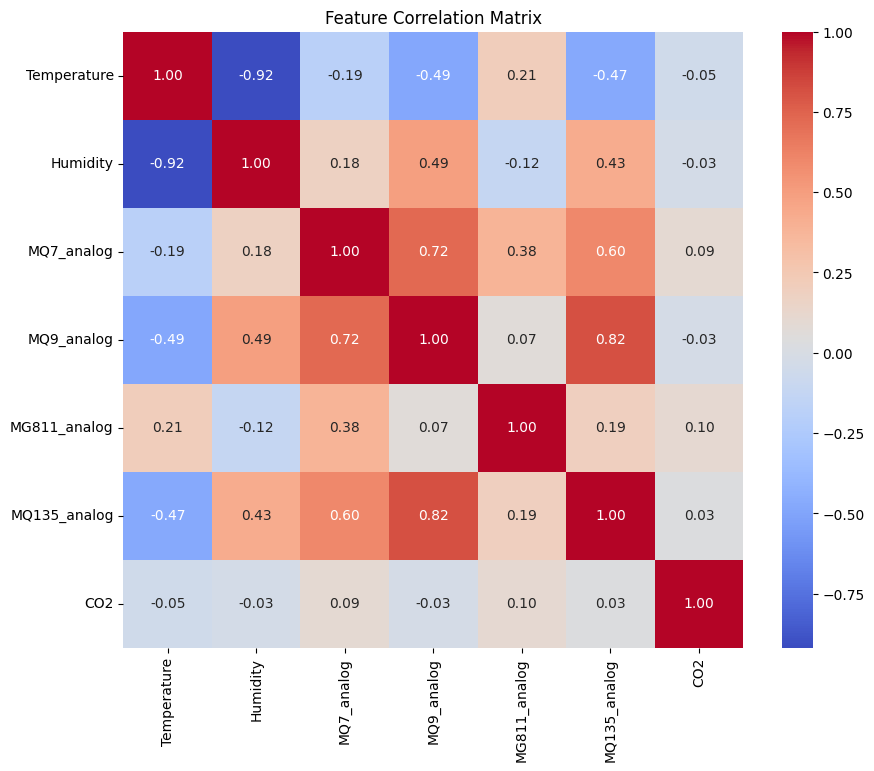

In [ ]:
import seaborn as sns

# Select numerical features from the DataFrame
numerical_features = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
# Investigate categorical feature (device_name)
print("\nUnique values in device_name:")
print(df['device_name'].unique())


Unique values in device_name:
['alpha' 'beta' 'charlie']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical sensor readings
sensor_columns = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog']
scaler = StandardScaler()
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

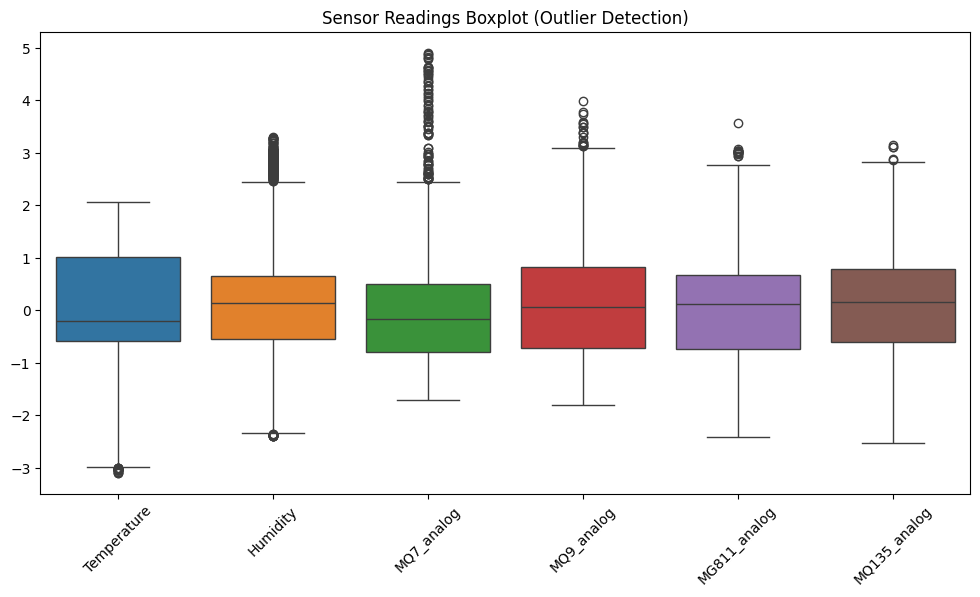

In [ ]:
# Boxplots to identify potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[sensor_columns])
plt.xticks(rotation=45)
plt.title("Sensor Readings Boxplot (Outlier Detection)")
plt.show()

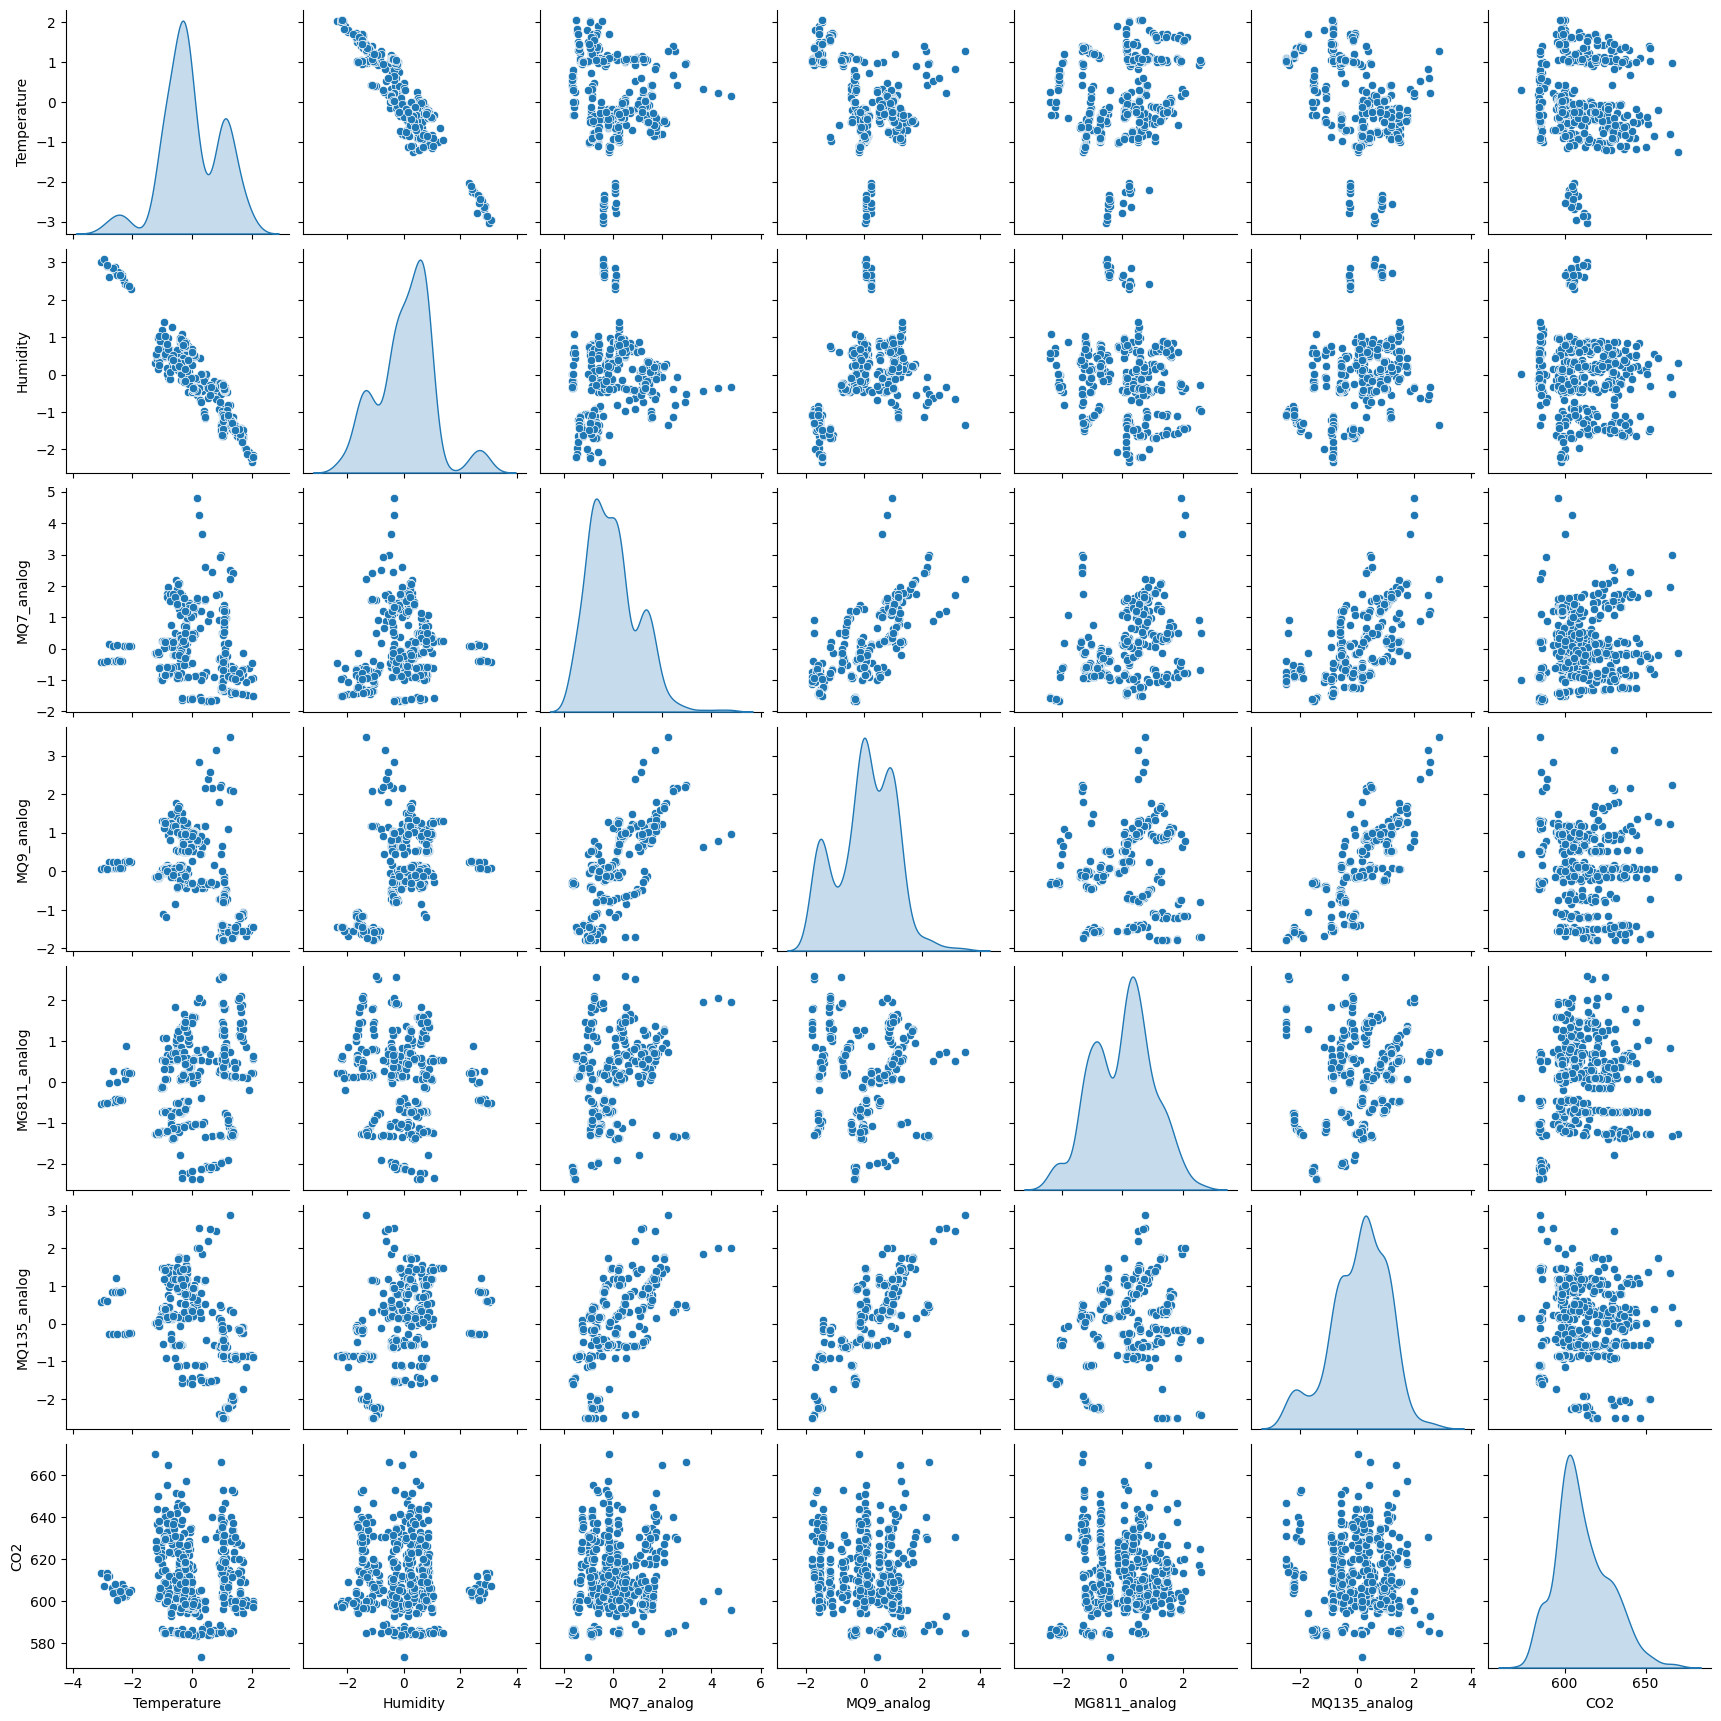

In [ ]:
# Pairplot to visualize relationships (for a subset of features if many exist)
sns.pairplot(df.sample(500), diag_kind='kde')  # Sampling for performance
plt.show()

In [ ]:
import numpy as np

# 'X_train' is the training data DataFrame
# Create polynomial features (degree 2)
for col in sensor_columns:
    X_train[col + '_squared'] = X_train[col]**2
    X_train[col + '_cubed'] = X_train[col]**3


# Create log-transformed features (handle potential zeros by adding a small constant)
for col in sensor_columns:
    X_train[col + '_log'] = np.log1p(X_train[col]) # log1p handles zero values gracefully


In [ ]:
import numpy as np

# Create polynomial features (degree 2) for X_val
for col in sensor_columns:
    X_val[col + '_squared'] = X_val[col]**2
    X_val[col + '_cubed'] = X_val[col]**3

# Create log-transformed features for X_val
for col in sensor_columns:
    X_val[col + '_log'] = np.log1p(X_val[col])

In [ ]:
from sklearn.model_selection import train_test_split

# Target variable is CO2
X = df.drop('CO2', axis=1)
y = df['CO2']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (5845, 8)
Validation set size: (1462, 8)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np


# Original features only
original_features = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog', 'device_name']
X_train_original = X_train[original_features]
X_val_original = X_val[original_features]

# Convert 'device_name' to numerical representation using one-hot encoding
X_train_original = pd.get_dummies(X_train_original, columns=['device_name'], drop_first=True)
X_val_original = pd.get_dummies(X_val_original, columns=['device_name'], drop_first=True)

# Align columns in X_val_original to match X_train_original
X_val_original = X_val_original.reindex(columns=X_train_original.columns, fill_value=0)


# Linear Regression
np.random.seed(0)
lr_model = LinearRegression()
lr_model.fit(X_train_original, y_train)
lr_pred = lr_model.predict(X_val_original)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
print(f"Linear Regression - RMSE: {lr_rmse}")

# Random Forest
np.random.seed(0)
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train_original, y_train)
rf_pred = rf_model.predict(X_val_original)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
print(f"Random Forest - RMSE: {rf_rmse}")

# Polynomial Regression
np.random.seed(0)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_original, y_train)
poly_pred = poly_model.predict(X_val_original)
poly_rmse = np.sqrt(mean_squared_error(y_val, poly_pred))
print(f"Polynomial Regression - RMSE: {poly_rmse}")

Linear Regression - RMSE: 15.411345023884445
Random Forest - RMSE: 5.089738392222473
Polynomial Regression - RMSE: 11.816726361086278


In [ ]:
# Hyperparameter Tuning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


# Original features only
original_features = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog', 'device_name']
X_train_original = X_train[original_features]
X_val_original = X_val[original_features]

# Convert 'device_name' to numerical representation using one-hot encoding
X_train_original = pd.get_dummies(X_train_original, columns=['device_name'], drop_first=True)
X_val_original = pd.get_dummies(X_val_original, columns=['device_name'], drop_first=True)

# Align columns in X_val_original to match X_train_original
X_val_original = X_val_original.reindex(columns=X_train_original.columns, fill_value=0)


# Linear Regression (No hyperparameter tuning)
np.random.seed(0)
lr_model = LinearRegression()
lr_model.fit(X_train_original, y_train)
lr_pred = lr_model.predict(X_val_original)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
print(f"Linear Regression - RMSE: {lr_rmse}")

# Random Forest with RandomizedSearchCV
np.random.seed(0)
rf_model = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid,
                                   n_iter=10, scoring='neg_root_mean_squared_error', cv=5,
                                   random_state=0, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train_original, y_train)

# Get the best model and predict
best_rf_model = rf_random_search.best_estimator_
rf_pred = best_rf_model.predict(X_val_original)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
print(f"Random Forest (Tuned) - RMSE: {rf_rmse}")


# Polynomial Regression with RandomizedSearchCV
np.random.seed(0)

# Define the pipeline
poly_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define the hyperparameter grid for Polynomial Regression
poly_param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],
}

# Create RandomizedSearchCV object
poly_random_search = RandomizedSearchCV(estimator=poly_pipeline, param_distributions=poly_param_grid,
                                      n_iter=3, scoring='neg_root_mean_squared_error', cv=5,
                                      random_state=0, n_jobs=-1)

# Fit the model
poly_random_search.fit(X_train_original, y_train)


# Get the best model and predict
best_poly_model = poly_random_search.best_estimator_
poly_pred = best_poly_model.predict(X_val_original)
poly_rmse = np.sqrt(mean_squared_error(y_val, poly_pred))
print(f"Polynomial Regression (Tuned) - RMSE: {poly_rmse}")

Linear Regression - RMSE: 15.411345023884445
Random Forest (Tuned) - RMSE: 5.035205658656707
Polynomial Regression (Tuned) - RMSE: 9.82498903706411


In [ ]:
# Load the test dataset
test_data_path = '/content/drive/MyDrive/test.csv'
df = pd.read_csv(test_data_path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display the first few rows of the dataset
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics of numerical features
print("\nSummary statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1292 non-null   object 
 1   Temperature   1292 non-null   float64
 2   Humidity      1292 non-null   float64
 3   MQ7_analog    1292 non-null   float64
 4   MQ9_analog    1292 non-null   float64
 5   MG811_analog  1292 non-null   float64
 6   MQ135_analog  1292 non-null   float64
 7   device_name   1292 non-null   object 
dtypes: float64(6), object(2)
memory usage: 80.9+ KB

First 5 rows:
          ID  Temperature  Humidity  MQ7_analog  MQ9_analog  MG811_analog  \
0  ID_007308       32.450    59.990      3504.0      1380.0        2642.5   
1  ID_007309       31.665    58.640      2864.0      1659.0        4456.0   
2  ID_007310       31.755    59.000      2850.5      1615.0        4391.0   
3  ID_007311       31.860    66.850      3853.5      2868.5        4170.5 

In [ ]:
# Using the random forest model to predict the CO2 levels in the test data

# Using the best random forest model from hyperparameter tuning
test_data_original = df[original_features]

# Align columns in test_data_original to match X_train_original
test_data_original = test_data_original.reindex(columns=X_train_original.columns, fill_value=0)

# Predict CO2 levels using the best random forest model
rf_test_pred = best_rf_model.predict(test_data_original)

# Print or save the predictions
rf_test_pred


array([633.31666667, 649.495     , 626.185     , ..., 614.92916667,
       627.22805556, 594.95527778])

In [ ]:
# Create a submission file that contains the ID and the predicted CO2 levels (Target)
# for each record in the test data.

# Create a DataFrame for submission
submission_df = pd.DataFrame({'ID': df['ID'], 'Target': rf_test_pred})

# Save the submission file to Google Drive
submission_file_path = '/content/drive/MyDrive/submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file saved to: {submission_file_path}")


Submission file saved to: /content/drive/MyDrive/submission.csv


In [ ]:
# Training the models with the polynomial and log-transformed features

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Reset X_train and X_val to original features before adding new ones:
original_features = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog']
X_train = X_train[original_features]  # Reset X_train
X_val = X_val[original_features]  # Reset X_val


# Create polynomial features (degree 2) for BOTH X_train and X_val:
for col in sensor_columns:
    X_train[col + '_squared'] = X_train[col]**2
    X_train[col + '_cubed'] = X_train[col]**3
    X_val[col + '_squared'] = X_val[col]**2  # Add to X_val as well
    X_val[col + '_cubed'] = X_val[col]**3  # Add to X_val as well

# Create log-transformed features for BOTH X_train and X_val:
for col in sensor_columns:
    X_train[col + '_log'] = np.log1p(X_train[col])
    X_val[col + '_log'] = np.log1p(X_val[col])  # Add to X_val as well



# Linear Regression with Polynomial and Log features
np.random.seed(0)
lr_model_poly_log = LinearRegression()
lr_model_poly_log.fit(X_train, y_train)
lr_pred_poly_log = lr_model_poly_log.predict(X_val)
lr_rmse_poly_log = np.sqrt(mean_squared_error(y_val, lr_pred_poly_log))
print(f"Linear Regression (Polynomial and Log features) - RMSE: {lr_rmse_poly_log}")

# Random Forest with Polynomial and Log features
np.random.seed(0)
rf_model_poly_log = RandomForestRegressor(random_state=0) # You might want to tune hyperparameters here
rf_model_poly_log.fit(X_train, y_train)
rf_pred_poly_log = rf_model_poly_log.predict(X_val)
rf_rmse_poly_log = np.sqrt(mean_squared_error(y_val, rf_pred_poly_log))
print(f"Random Forest (Polynomial and Log features) - RMSE: {rf_rmse_poly_log}")


ValueError: Expected a 1D array, got an array with shape (5845, 2)